# The Business Case:
  You work as a data scientist at a multinational corporation.
  The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are more likely to quit.
  DataSource: www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
  
##Here's a Sample of the Dataset:
####JobInvolvement
####Education
####JobSatisfaction
####PerformanceRating
####RelationshipSatisfaction
####WorkLifeBalance

# Importing Libraries and Dataset...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('file_hr.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploring the Data...


In [6]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)

In [7]:
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [8]:
data['Over18'] = data['Over18'].apply(lambda x:1 if x == 'Y' else 0)
data['Over18']

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Over18, Length: 1470, dtype: int64

In [9]:
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
data['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

Checking the missing values...


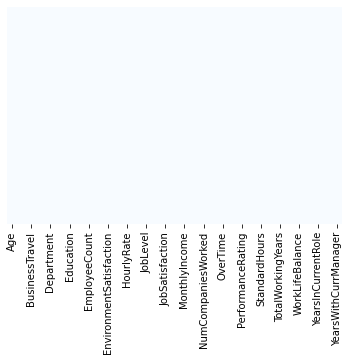

In [10]:
sns.heatmap(data.isnull(),yticklabels= False,cbar= False, cmap = 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c271f410>,
      dtype=object)

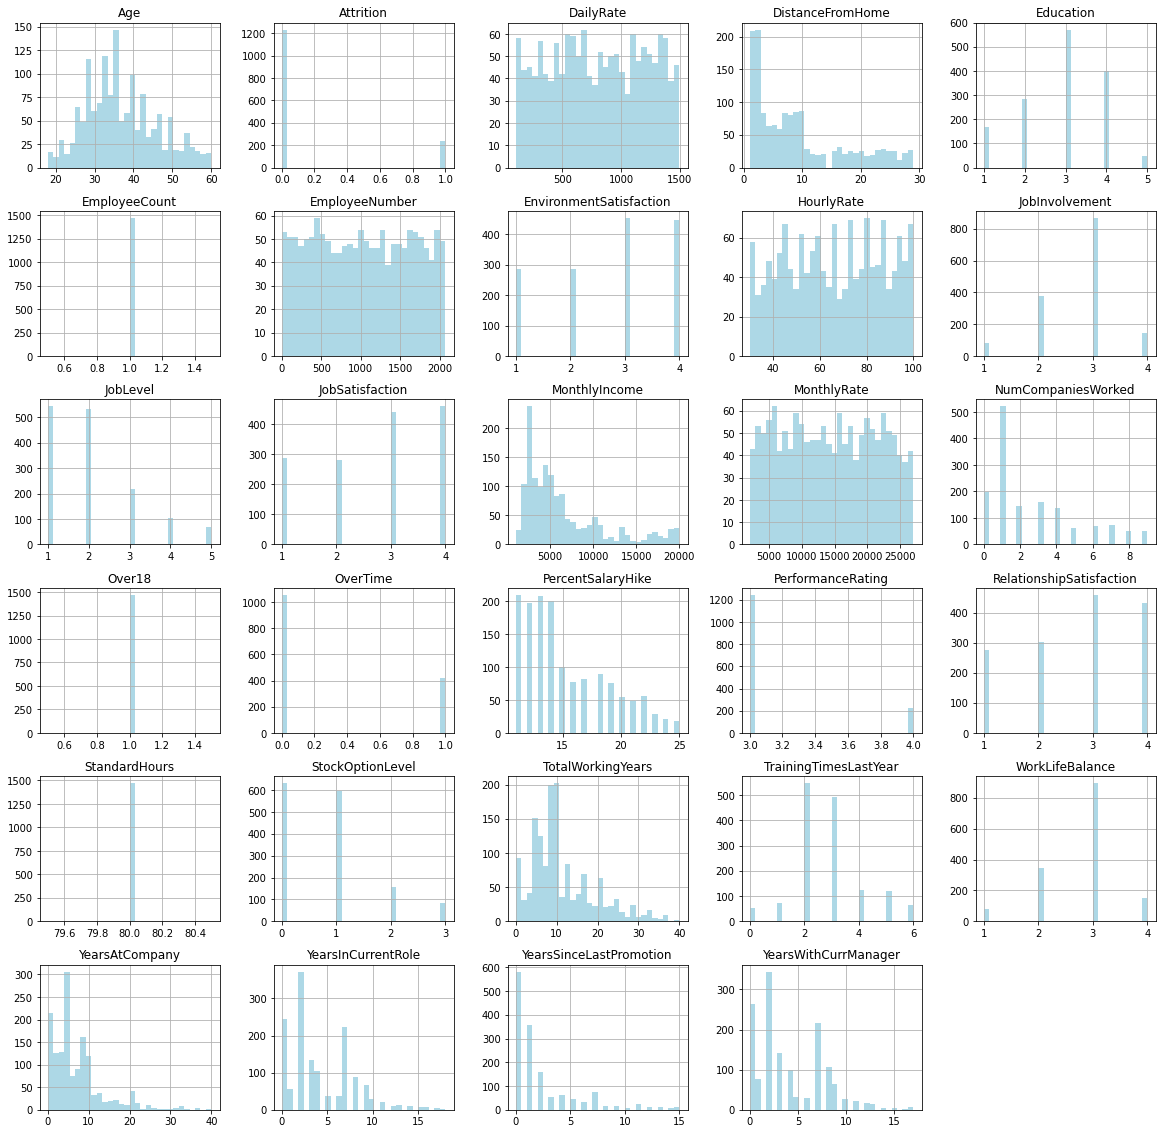

In [11]:
data.hist(bins = 30, color = 'lightblue',figsize =(20,20))

In [12]:
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],inplace = True,axis = 1)

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [14]:
# Let's see how many people left and stayed on the company!
left_df = data[data['Attrition']==1]
stayed_df = data[data['Attrition']==0]

In [15]:
print('Total: ', len(data))
print('% of employees who left:',1.*round(len(left_df)/(len(data))*100,2),"%")

Total:  1470
% of employees who left: 16.12 %


Let's compare the mean and std between the group of who stayed and who left the company:
##### Age
##### DailyRate
##### DistanceFromHome
##### EnviromentSatisfaction
##### JobSatisfaction
##### StockOptionLevel


In [16]:
left_df.describe()[['DailyRate',"JobSatisfaction",'StockOptionLevel','EnvironmentSatisfaction','DistanceFromHome','Age']].iloc[1:3,:]

,DailyRate,JobSatisfaction,StockOptionLevel,EnvironmentSatisfaction,DistanceFromHome,Age
mean,750.362869,2.468354,0.527426,2.464135,10.632911,33.607595
std,401.899519,1.118058,0.856361,1.169791,8.452525,9.689350


In [17]:
stayed_df.describe()[['DailyRate',"JobSatisfaction",'StockOptionLevel','EnvironmentSatisfaction','DistanceFromHome','Age']].iloc[1:3,:]

,DailyRate,JobSatisfaction,StockOptionLevel,EnvironmentSatisfaction,DistanceFromHome,Age
mean,812.504461,2.778589,0.845093,2.771290,8.915653,37.561233
std,403.208379,1.093277,0.841985,1.071132,8.012633,8.888360


we can analyze that all mean values, with the exception of distance from home, are higher in the group that stayed at the company.

# Visualizing the Data

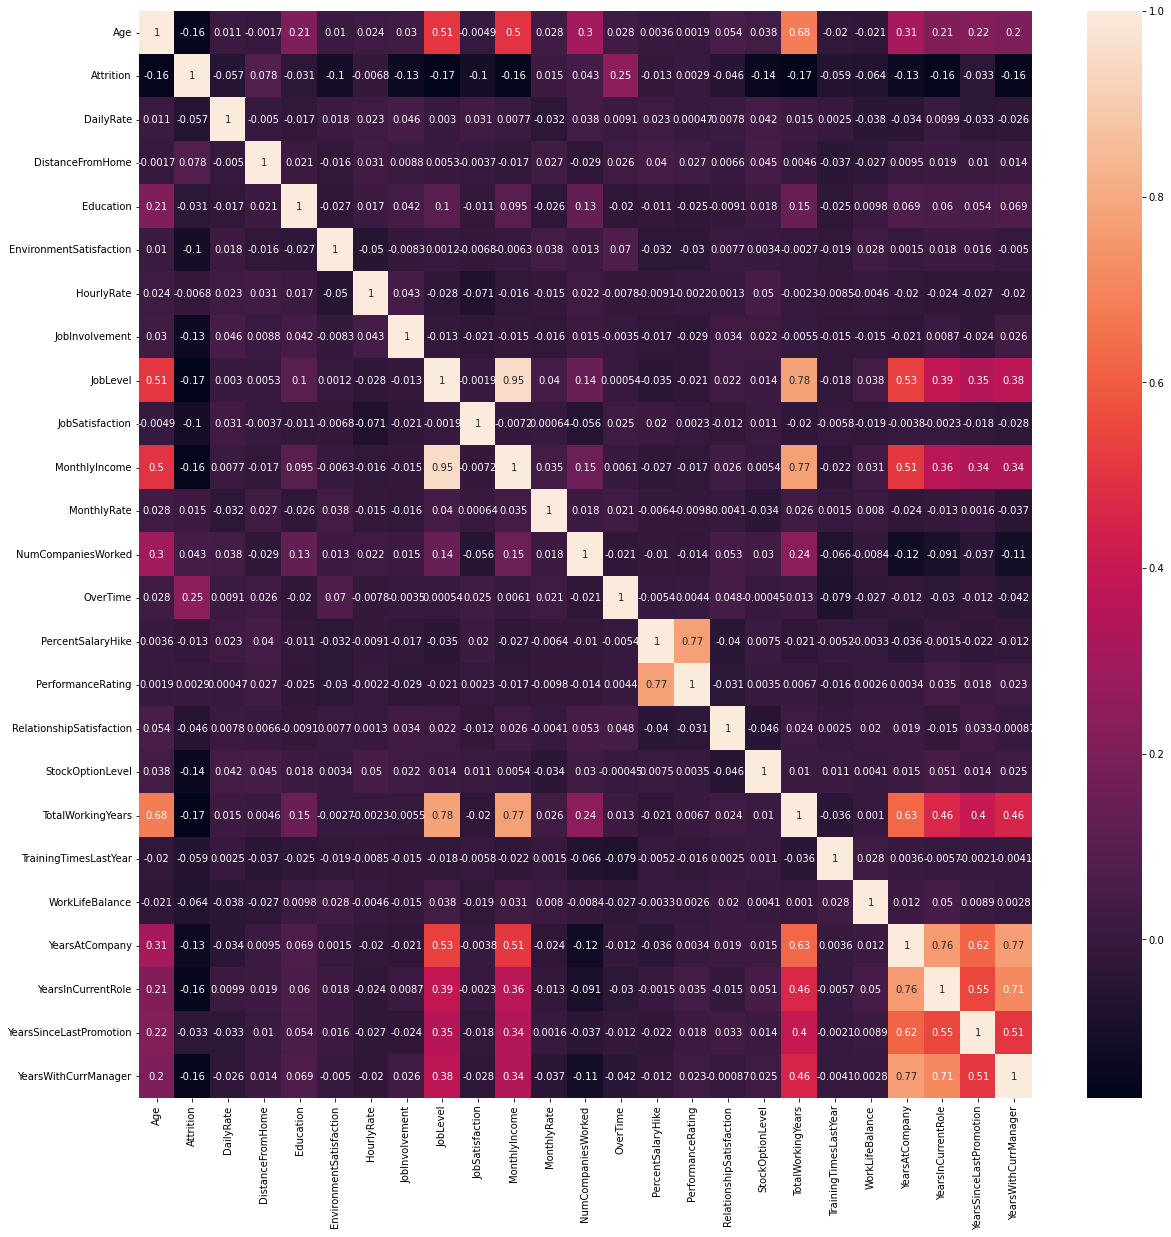

In [20]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations,annot=True)

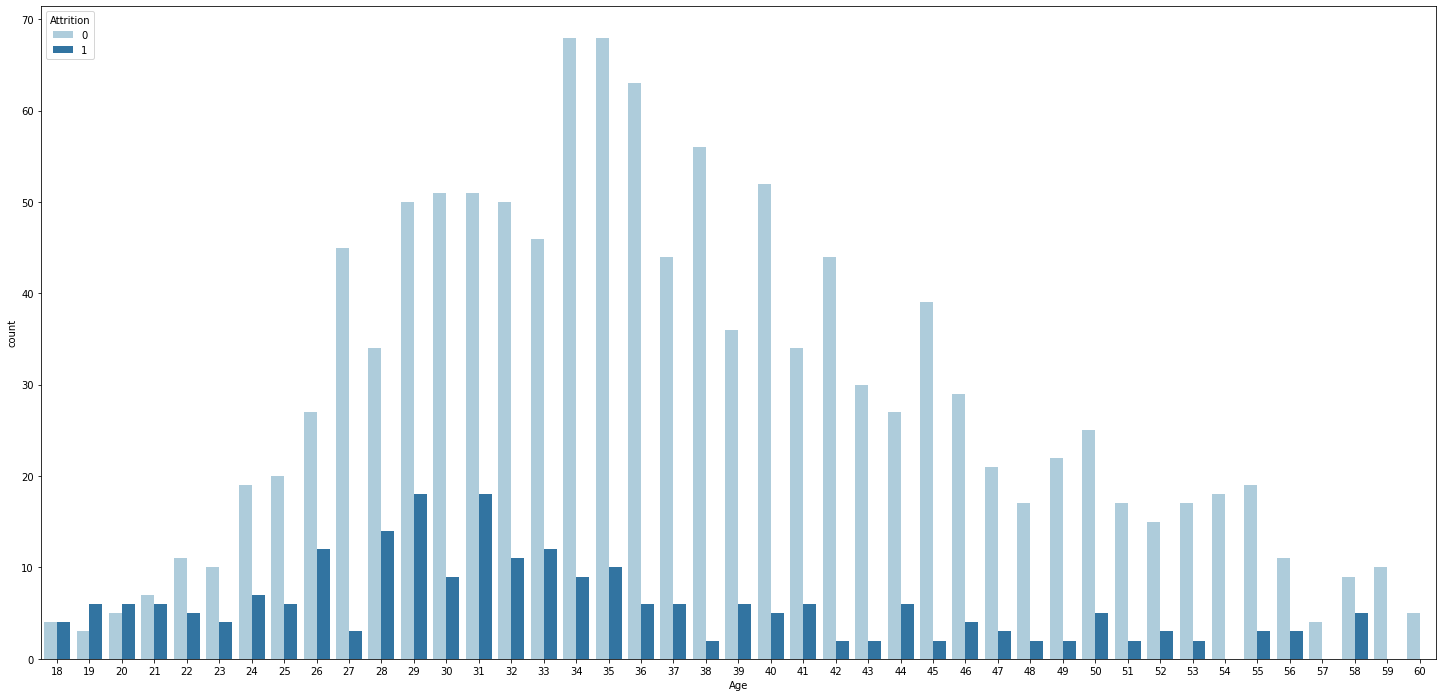

In [21]:
plt.figure(figsize = [25,12])
sns.set_palette('Paired')
sns.countplot(x = 'Age',hue = 'Attrition', data = data)

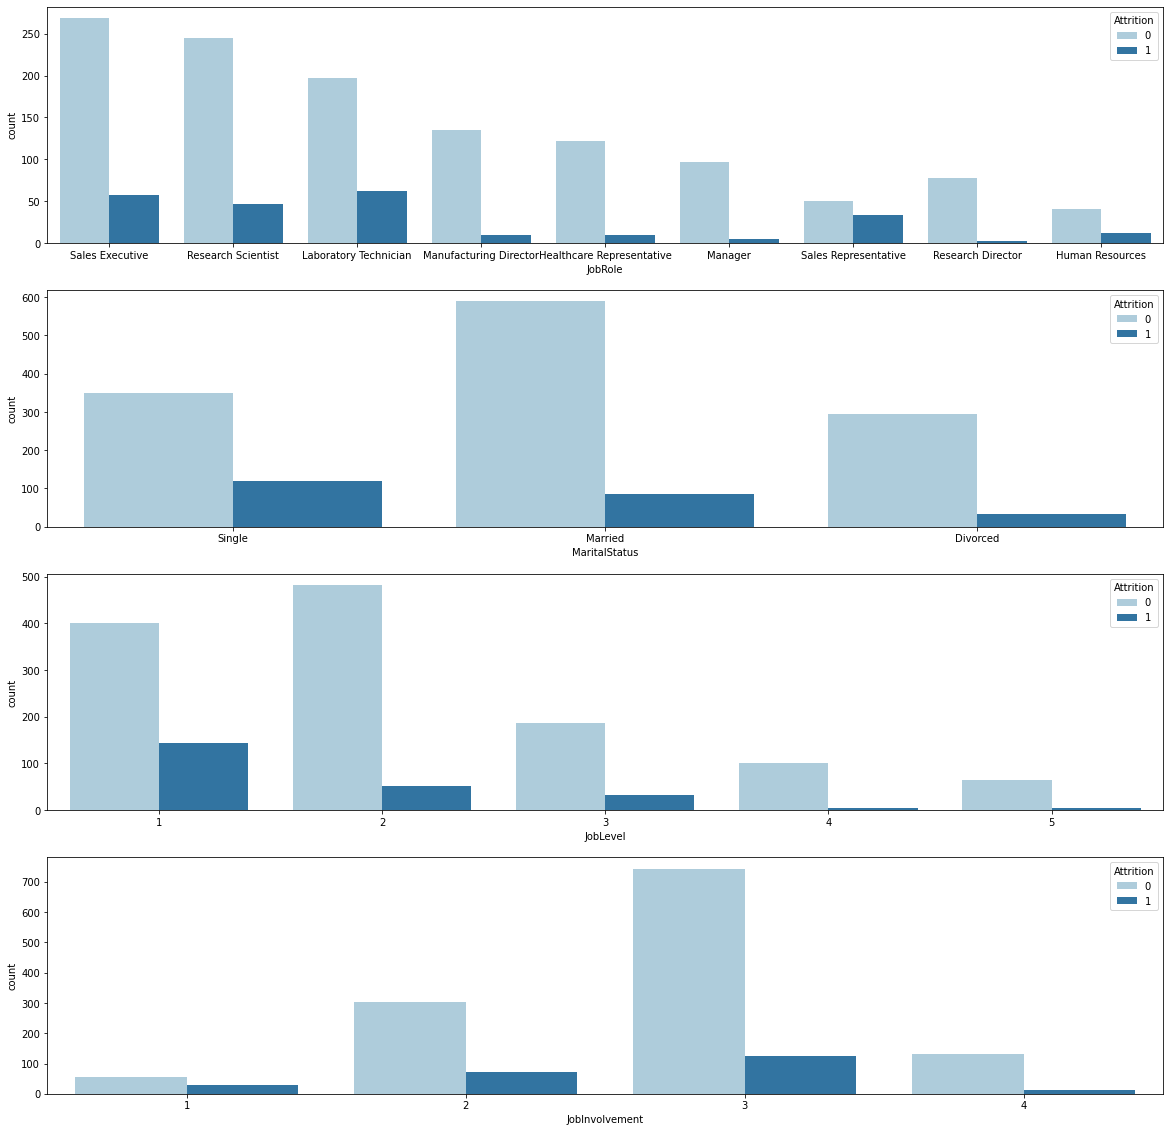

In [22]:
plt.figure(figsize = [20,20])
sns.set_palette('Paired')
plt.subplot(411)
sns.countplot(x= 'JobRole',hue = "Attrition", data= data)
plt.subplot(412)
sns.countplot(x= 'MaritalStatus',hue = "Attrition", data= data)
plt.subplot(413)
sns.countplot(x= 'JobLevel',hue = "Attrition", data= data)
plt.subplot(414)
sns.countplot(x= 'JobInvolvement',hue = "Attrition", data= data)


# Preparing the Data...


In [23]:
X_cat = data[['BusinessTravel','Department','Gender','EducationField','MaritalStatus','JobRole']]

In [24]:
X_cat

,BusinessTravel,Department,Gender,EducationField,MaritalStatus,JobRole
0,Travel_Rarely,Sales,Female,Life Sciences,Single,Sales Executive
1,Travel_Frequently,Research & Development,Male,Life Sciences,Married,Research Scientist
2,Travel_Rarely,Research & Development,Male,Other,Single,Laboratory Technician
3,Travel_Frequently,Research & Development,Female,Life Sciences,Married,Research Scientist
4,Travel_Rarely,Research & Development,Male,Medical,Married,Laboratory Technician
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Male,Medical,Married,Laboratory Technician
1466,Travel_Rarely,Research & Development,Male,Medical,Married,Healthcare Representative
1467,Travel_Rarely,Research & Development,Male,Life Sciences,Married,Manufacturing Director
1468,Travel_Frequently,Sales,Male,Medical,Married,Sales Executive


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [27]:
X_cat.shape

(1470, 26)

In [28]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_numerical = data.drop(['BusinessTravel','Department','Gender','EducationField','MaritalStatus','JobRole'],axis = 1)
X_numerical.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [30]:
X_all = pd.concat([X_numerical,X_cat], axis = 1)
X_all.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
x = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [34]:
x.shape

(1470, 51)

In [35]:
x = pd.DataFrame(x)
y = x.pop(1)
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model

In [73]:
Logreg = LogisticRegression()
Logreg.fit(X_train,Y_train)

LogisticRegression()

In [74]:
from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
y_predRL = Logreg.predict(X_test)
print(classification_report(Y_test, y_predRL))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       416
         1.0       0.71      0.34      0.46        70

    accuracy                           0.88       486
   macro avg       0.80      0.66      0.70       486
weighted avg       0.87      0.88      0.87       486



# ANN Model

In [76]:
import tensorflow as tf

In [77]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50,)))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               25500     
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer= 'Adam',loss='binary_crossentropy',metrics='accuracy')

In [80]:
epoch_hist = model.fit(X_train,Y_train,epochs =100)

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 0.4225 - accuracy: 0.8262
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 0.3350 - accuracy: 0.8648
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.8760
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8994
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.2378 - accuracy: 0.9136
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.2062 - accuracy: 0.9167
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 0.1743 - accuracy: 0.9411
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 0.1779 - accuracy: 0.9157
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 0.1119 - accuracy: 0.9624
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0822 - accuracy: 0.9705
Epoch 11/

In [81]:
y_pred = model.predict(X_test)
y_pred

array([[1.20765865e-02],
       [1.04778314e-15],
       [1.17117537e-07],
       [2.22113841e-14],
       [9.22441151e-11],
       [1.35335786e-05],
       [1.74677807e-05],
       [2.21749615e-12],
       [4.23852068e-14],
       [7.13110848e-10],
       [4.19982399e-07],
       [9.00555824e-05],
       [1.57149738e-10],
       [8.40967544e-08],
       [2.97851716e-10],
       [9.50157642e-04],
       [5.29144610e-12],
       [8.95390329e-14],
       [1.59747121e-15],
       [4.29551516e-14],
       [9.99995470e-01],
       [1.11265774e-13],
       [6.31372288e-08],
       [1.61157777e-06],
       [5.79699874e-03],
       [1.07102445e-10],
       [1.12424148e-09],
       [8.17438904e-14],
       [2.47873086e-05],
       [1.07158493e-09],
       [2.51767465e-12],
       [6.29121366e-10],
       [7.53105075e-24],
       [3.77570224e-08],
       [9.85920012e-01],
       [3.62972320e-14],
       [5.40481650e-22],
       [5.60440366e-15],
       [9.99999642e-01],
       [1.59978638e-14],


In [82]:
y_pred = (y_pred > 0.5)

Text(0.5, 1.0, 'Model progress Accuracy metric')

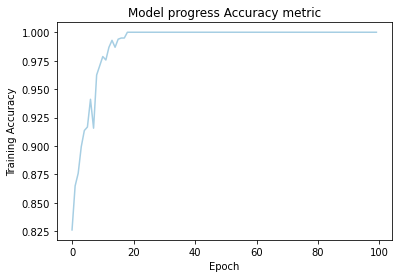

In [83]:
plt.plot(epoch_hist.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Model progress Accuracy metric')

Text(0.5, 1.0, 'Model progress Loss')

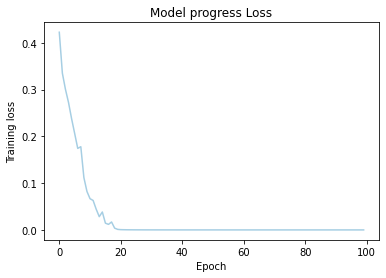

In [84]:
plt.plot(epoch_hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.title('Model progress Loss')

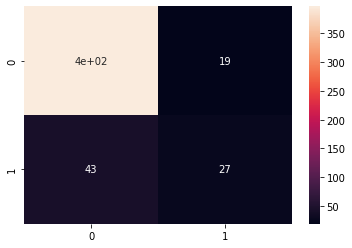

In [85]:

cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

# ANN Classification report

In [86]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       416
         1.0       0.59      0.39      0.47        70

    accuracy                           0.87       486
   macro avg       0.74      0.67      0.70       486
weighted avg       0.86      0.87      0.86       486



# Logistic Regression Classification report

In [87]:
print(classification_report(Y_test, y_predRL))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       416
         1.0       0.71      0.34      0.46        70

    accuracy                           0.88       486
   macro avg       0.80      0.66      0.70       486
weighted avg       0.87      0.88      0.87       486



We can realize that Logistic Regression was the best model, cause we need the higher precision for 1.0 ( leave the company ). because false positives in this case indicate a less accurate number of employees who tend to stay in the company.